### Importing Required Libraries

In [2070]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns',200)
pd.set_option('display.max_rows',200)

### Data Loading

In [2071]:
lead=pd.read_csv('/Users/kiranraju/Desktop/Leads.csv')
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,Select,Select,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,Select,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,Select,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2072]:
lead2=lead

### Data Inspection

In [2073]:
lead.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
Prospect ID                                      9240 non-null object
Lead Number                                      9240 non-null int64
Lead Origin                                      9240 non-null object
Lead Source                                      9204 non-null object
Do Not Email                                     9240 non-null object
Do Not Call                                      9240 non-null object
Converted                                        9240 non-null int64
TotalVisits                                      9103 non-null float64
Total Time Spent on Website                      9240 non-null int64
Page Views Per Visit                             9103 non-null float64
Last Activity                                    9137 non-null object
Country                                          6779 non-null object
Specialization                                   7802 

In [2074]:
## Analyzing the statistical parameters of the data set

lead.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [2075]:
## Replacing the all the select fields with nan as intructed.

lead = lead.replace('Select', np.nan)
lead.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,How did you hear about X Education,What is your current occupation,What matters most to you in choosing a course,Search,Magazine,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,Receive More Updates About Our Courses,Tags,Lead Quality,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,NaN,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Interested in other courses,Low in Relevance,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,India,NaN,NaN,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,NaN,No,No,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,India,Business Administration,NaN,Student,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,India,Media and Advertising,Word Of Mouth,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Ringing,Not Sure,No,No,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,India,NaN,Other,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,No,Will revert after reading the email,Might be,No,No,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [2076]:
## Check in the null valeus in the columns

lead.isnull().sum().sort_values(ascending=False)

How did you hear about X Education               7250
Lead Profile                                     6855
Lead Quality                                     4767
Asymmetrique Profile Score                       4218
Asymmetrique Activity Score                      4218
Asymmetrique Profile Index                       4218
Asymmetrique Activity Index                      4218
City                                             3669
Specialization                                   3380
Tags                                             3353
What matters most to you in choosing a course    2709
What is your current occupation                  2690
Country                                          2461
TotalVisits                                       137
Page Views Per Visit                              137
Last Activity                                     103
Lead Source                                        36
Lead Origin                                         0
Lead Number                 

In [2077]:
## Checking the null values in the columns with respect to percentage

round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values()

Prospect ID                                       0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
A free copy of Mastering The Interview            0.00
Magazine                                          0.00
Search                                            0.00
Newspaper Article                                 0.00
Last Notable Activity                             0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
Lead Numbe

In [2078]:
## Dropping columns with percentage greater than 45%


cols =lead.columns[round(100*(lead.isnull().sum()/len(lead.index)),2)>45]
lead.drop(cols, axis=1,inplace=True)

In [2079]:
round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values()

Prospect ID                                       0.00
I agree to pay the amount through cheque          0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Magazine                                          0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Email                                      0.00
Lead Origi

In [2080]:
## Checking for skewed category for the columns "City"

lead['City'].value_counts(normalize=True)

Mumbai                         0.578352
Thane & Outskirts              0.134985
Other Cities                   0.123138
Other Cities of Maharashtra    0.082032
Other Metro Cities             0.068210
Tier II Cities                 0.013283
Name: City, dtype: float64

In [2081]:
## Imputing NAN with mode 'Mumbai'

lead['City'] = lead['City'].replace(np.nan, 'Mumbai')

In [2082]:
round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values()

Prospect ID                                       0.00
I agree to pay the amount through cheque          0.00
City                                              0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Magazine                                          0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Call                                       0.00
Do Not Ema

In [2083]:
## Checking for skewed category for the column "Specialization"

lead['Specialization'].value_counts(normalize=True)

Finance Management                   0.166553
Human Resource Management            0.144710
Marketing Management                 0.143003
Operations Management                0.085836
Business Administration              0.068771
IT Projects Management               0.062457
Supply Chain Management              0.059556
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
Healthcare Management                0.027133
Hospitality Management               0.019454
E-COMMERCE                           0.019113
Retail Management                    0.017065
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [2084]:
## Combining the different smaller catergories into Management Specializations

lead['Specialization'] = lead['Specialization'].replace(['Finance Management','Human Resource Management',
                                                           'Marketing Management','Operations Management',
                                                           'IT Projects Management','Supply Chain Management',
                                                    'Healthcare Management','Hospitality Management',
                                                           'Retail Management'] ,'Management_Specializations')  

In [2085]:
## Values after combining the categoris of 'Specialization'

lead['Specialization'].value_counts(normalize=True)

Management_Specializations           0.725768
Business Administration              0.068771
Banking, Investment And Insurance    0.057679
Media and Advertising                0.034642
Travel and Tourism                   0.034642
International Business               0.030375
E-COMMERCE                           0.019113
Rural and Agribusiness               0.012457
E-Business                           0.009727
Services Excellence                  0.006826
Name: Specialization, dtype: float64

In [2086]:
## Imputing NAN values the highest frequency

lead['Specialization'] = lead['Specialization'].replace(np.nan,'Management_Specializations')

In [2087]:
round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values()

Prospect ID                                       0.00
I agree to pay the amount through cheque          0.00
City                                              0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Magazine                                          0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
Specialization                                    0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Cal

In [2088]:
## Dropping the 'Tags' as it is a score variable


lead.drop('Tags',axis=1, inplace=True)

In [2089]:
round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values()

Prospect ID                                       0.00
I agree to pay the amount through cheque          0.00
City                                              0.00
Get updates on DM Content                         0.00
Update me on Supply Chain Content                 0.00
Receive More Updates About Our Courses            0.00
Through Recommendations                           0.00
Digital Advertisement                             0.00
Newspaper                                         0.00
X Education Forums                                0.00
Newspaper Article                                 0.00
Magazine                                          0.00
Search                                            0.00
A free copy of Mastering The Interview            0.00
Last Notable Activity                             0.00
Specialization                                    0.00
Total Time Spent on Website                       0.00
Converted                                         0.00
Do Not Cal

In [2090]:
## Checking for skewed categories

lead['What matters most to you in choosing a course'].value_counts(normalize=True)

Better Career Prospects      0.999541
Flexibility & Convenience    0.000306
Other                        0.000153
Name: What matters most to you in choosing a course, dtype: float64

In [2091]:
## Dropping the column 'What matters most to you in choosing a course' as it is skewed


lead.drop('What matters most to you in choosing a course',axis=1, inplace=True)

In [2092]:
round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values()

Prospect ID                                  0.00
I agree to pay the amount through cheque     0.00
City                                         0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Digital Advertisement                        0.00
Newspaper                                    0.00
X Education Forums                           0.00
Newspaper Article                            0.00
Magazine                                     0.00
Search                                       0.00
Last Notable Activity                        0.00
Specialization                               0.00
Total Time Spent on Website                  0.00
Converted                                    0.00
Do Not Call                                  0.00
Do Not Email                                 0.00
Lead Origin                                  0.00


In [2093]:
## Checking for skewed categories

lead['What is your current occupation'].value_counts(normalize=True)

Unemployed              0.854962
Working Professional    0.107786
Student                 0.032061
Other                   0.002443
Housewife               0.001527
Businessman             0.001221
Name: What is your current occupation, dtype: float64

In [2094]:
## Imputing NAN values the highest frequency

lead['What is your current occupation'] = lead['What is your current occupation'].replace(np.nan,'Unemployed') 

In [2095]:
round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values()

Prospect ID                                  0.00
I agree to pay the amount through cheque     0.00
City                                         0.00
Get updates on DM Content                    0.00
Update me on Supply Chain Content            0.00
Receive More Updates About Our Courses       0.00
Through Recommendations                      0.00
Digital Advertisement                        0.00
Newspaper                                    0.00
X Education Forums                           0.00
Newspaper Article                            0.00
Magazine                                     0.00
Search                                       0.00
What is your current occupation              0.00
Specialization                               0.00
Total Time Spent on Website                  0.00
Converted                                    0.00
Do Not Call                                  0.00
Do Not Email                                 0.00
Lead Origin                                  0.00


In [2096]:
## Checking for skewed categories

lead['Country'].value_counts(normalize=True)

India                   0.957663
United States           0.010178
United Arab Emirates    0.007818
Singapore               0.003540
Saudi Arabia            0.003098
United Kingdom          0.002213
Australia               0.001918
Qatar                   0.001475
Hong Kong               0.001033
Bahrain                 0.001033
Oman                    0.000885
France                  0.000885
unknown                 0.000738
Nigeria                 0.000590
Canada                  0.000590
South Africa            0.000590
Kuwait                  0.000590
Germany                 0.000590
Sweden                  0.000443
Netherlands             0.000295
Ghana                   0.000295
Belgium                 0.000295
Italy                   0.000295
Asia/Pacific Region     0.000295
Bangladesh              0.000295
Philippines             0.000295
China                   0.000295
Uganda                  0.000295
Liberia                 0.000148
Tanzania                0.000148
Denmark   

In [2097]:
## Dropping the column 'Country' as it is skewed

lead.drop(columns='Country',axis=1,inplace=True)

In [2098]:
round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values()

Prospect ID                                 0.00
I agree to pay the amount through cheque    0.00
City                                        0.00
Get updates on DM Content                   0.00
Update me on Supply Chain Content           0.00
Receive More Updates About Our Courses      0.00
Through Recommendations                     0.00
Digital Advertisement                       0.00
Newspaper                                   0.00
X Education Forums                          0.00
Newspaper Article                           0.00
Magazine                                    0.00
A free copy of Mastering The Interview      0.00
Search                                      0.00
Specialization                              0.00
Total Time Spent on Website                 0.00
Converted                                   0.00
Do Not Call                                 0.00
Do Not Email                                0.00
Lead Origin                                 0.00
Lead Number         

In [2099]:
## Analyzing the total visits data and its ranges

lead['TotalVisits'].describe(percentiles=[0.05,.25, .5, .75, .90, .95, .99])

count    9103.000000
mean        3.445238
std         4.854853
min         0.000000
5%          0.000000
25%         1.000000
50%         3.000000
75%         5.000000
90%         7.000000
95%        10.000000
99%        17.000000
max       251.000000
Name: TotalVisits, dtype: float64

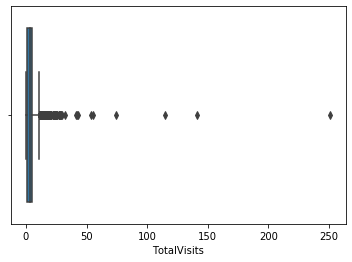

In [2100]:
sns.boxplot(lead['TotalVisits'])

#### As we notice, there are outlier present, we have to perform outlier treatment on this column. This will be done below.

In [2101]:
## Analyzing the total visits data and its ranges

lead['Page Views Per Visit'].describe()

count    9103.000000
mean        2.362820
std         2.161418
min         0.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        55.000000
Name: Page Views Per Visit, dtype: float64

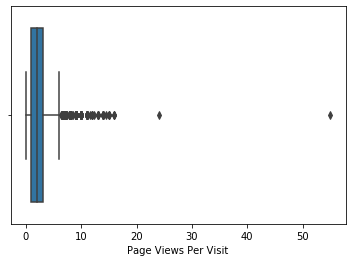

In [2102]:
sns.boxplot(lead['Page Views Per Visit'])

#### As we notice, there are outlier present, we have to perform outlier treatment on this column. This will be done below.

In [2103]:
lead['Total Time Spent on Website'].describe()

count    9240.000000
mean      487.698268
std       548.021466
min         0.000000
25%        12.000000
50%       248.000000
75%       936.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

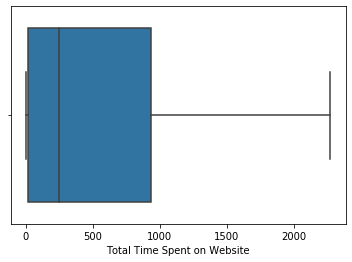

In [2104]:
sns.boxplot(lead['Total Time Spent on Website'])

#### As we notice, there are outlier present, we have to perform outlier treatment on this column. This will be done below.

In [2105]:
## Checking for skewed categories

lead['Last Activity'].value_counts(normalize=True)

Email Opened                    0.376163
SMS Sent                        0.300427
Olark Chat Conversation         0.106490
Page Visited on Website         0.070045
Converted to Lead               0.046843
Email Bounced                   0.035679
Email Link Clicked              0.029222
Form Submitted on Website       0.012696
Unreachable                     0.010178
Unsubscribed                    0.006676
Had a Phone Conversation        0.003283
Approached upfront              0.000985
View in browser link Clicked    0.000657
Email Marked Spam               0.000219
Email Received                  0.000219
Visited Booth in Tradeshow      0.000109
Resubscribed to emails          0.000109
Name: Last Activity, dtype: float64

In [2106]:
## Combining the different smaller catergories into Others

lead['Last Activity'] = lead['Last Activity'].replace(['Unreachable','Unsubscribed',
                                                        'Had a Phone Conversation', 
                                                        'Approached upfront',
                                                        'View in browser link Clicked',       
                                                        'Email Marked Spam',                  
                                                        'Email Received','Resubscribed to emails',
                                                         'Visited Booth in Tradeshow'],'Others')

In [2107]:
## Imputing the NAN values with Others.

lead['Last Activity'] = lead['Last Activity'].replace(np.nan,'Others')

In [2108]:
lead.dropna(inplace = True)

In [2109]:
round(100*(lead.isnull().sum()/len(lead.index)),2).sort_values()

Prospect ID                                 0.0
I agree to pay the amount through cheque    0.0
City                                        0.0
Get updates on DM Content                   0.0
Update me on Supply Chain Content           0.0
Receive More Updates About Our Courses      0.0
Through Recommendations                     0.0
Digital Advertisement                       0.0
Newspaper                                   0.0
X Education Forums                          0.0
Newspaper Article                           0.0
Magazine                                    0.0
A free copy of Mastering The Interview      0.0
Search                                      0.0
Specialization                              0.0
Last Activity                               0.0
Page Views Per Visit                        0.0
Total Time Spent on Website                 0.0
TotalVisits                                 0.0
Converted                                   0.0
Do Not Call                             

In [2110]:
## Checking for skewed categories

lead['Last Notable Activity'].value_counts(normalize=True)

Modified                        0.360040
Email Opened                    0.311109
SMS Sent                        0.237161
Page Visited on Website         0.035045
Olark Chat Conversation         0.020168
Email Link Clicked              0.019065
Email Bounced                   0.006612
Unsubscribed                    0.004959
Unreachable                     0.003527
Had a Phone Conversation        0.001543
Email Marked Spam               0.000220
View in browser link Clicked    0.000110
Form Submitted on Website       0.000110
Email Received                  0.000110
Approached upfront              0.000110
Resubscribed to emails          0.000110
Name: Last Notable Activity, dtype: float64

In [2111]:
## Combining the smaller percentage categoreis into Others_Notable Activity

lead['Last Notable Activity'] = lead['Last Notable Activity'].replace(['Had a Phone Conversation','Email Marked Spam','Unreachable',
                                                                   'Unsubscribed','Email Bounced','Resubscribed to emails',
                                                    'View in browser link Clicked','Approached upfront', 
                                                        'Form Submitted on Website','Email Received'],'Other_Notable_Activity')

In [2112]:
## Checking for skewed categories

lead['Lead Origin'].value_counts(normalize=True)

Landing Page Submission    0.538351
API                        0.394313
Lead Add Form              0.064029
Lead Import                0.003306
Name: Lead Origin, dtype: float64

In [2113]:
## Checking for skewed categories

lead['Lead Source'].value_counts(normalize=True)

Google               0.316068
Direct Traffic       0.280251
Olark Chat           0.193189
Organic Search       0.127177
Reference            0.048821
Welingak Website     0.014216
Referral Sites       0.013776
Facebook             0.003416
bing                 0.000661
google               0.000551
Click2call           0.000441
Live Chat            0.000220
Social Media         0.000220
Press_Release        0.000220
WeLearn              0.000110
blog                 0.000110
Pay per Click Ads    0.000110
testone              0.000110
NC_EDM               0.000110
welearnblog_Home     0.000110
youtubechannel       0.000110
Name: Lead Source, dtype: float64

In [2114]:
## Combining the smaller percentage categoreis into Other_Lead_Source

lead['Lead Source'] = lead['Lead Source'].replace(['google','Google'])
lead['Lead Source'] = lead['Lead Source'].replace(['Facebook','bing','Click2call','Social Media','Press_Release',
                                                     'youtubechannel','welearnblog_Home','Live Chat',
                                                     'WeLearn','blog','Pay per Click Ads',
                                                    'testone','NC_EDM'] ,'Other_Lead_Source') 

In [2115]:
## Checking for skewed categories

lead['Do Not Email'].value_counts(normalize=True)

No     0.921093
Yes    0.078907
Name: Do Not Email, dtype: float64

#### Note : Inspite of having skewed category, it better to keep this column. As most of the leads might be just surfing to collate data and can be propective students


In [2116]:
## Checking for skewed categories

lead['Do Not Call'].value_counts(normalize=True)

No     0.99978
Yes    0.00022
Name: Do Not Call, dtype: float64

#### Note : Inspite of having skewed category, it better to keep this column. As most of the leads might be just surfing to collate data and can be propective students

In [2117]:
#lead.drop('Do Not Call',axis=1,inplace=Tru

In [2118]:
lead['Converted'].value_counts(normalize=True)

0    0.621446
1    0.378554
Name: Converted, dtype: float64

In [2119]:
## Checking for skewed category

lead['Search'].value_counts(normalize=True)

No     0.998457
Yes    0.001543
Name: Search, dtype: float64

In [2120]:
## Dropping the skewed category columns

lead.drop('Search',axis=1,inplace=True)

In [2121]:
## Checking for skewed category

lead['Magazine'].value_counts(normalize=True)

No    1.0
Name: Magazine, dtype: float64

In [2122]:
## Dropping the skewed category columns

lead.drop('Magazine',axis=1,inplace=True)

In [2123]:
## Checking for skewed category

lead['Newspaper Article'].value_counts(normalize=True)

No     0.99978
Yes    0.00022
Name: Newspaper Article, dtype: float64

In [2124]:
## Dropping the skewed category columns

lead.drop('Newspaper Article',axis=1,inplace=True)

In [2125]:
## Checking for skewed category

lead['X Education Forums'].value_counts(normalize=True)

No     0.99989
Yes    0.00011
Name: X Education Forums, dtype: float64

In [2126]:
## Dropping the skewed category columns

lead.drop('X Education Forums',axis=1,inplace=True)

In [2127]:
## Checking for skewed category

lead['Newspaper'].value_counts(normalize=True)

No     0.99989
Yes    0.00011
Name: Newspaper, dtype: float64

In [2128]:
## Dropping the skewed category columns

lead.drop('Newspaper',axis=1,inplace=True)

In [2129]:
## Checking for skewed category

lead['Digital Advertisement'].value_counts(normalize=True)

No     0.999559
Yes    0.000441
Name: Digital Advertisement, dtype: float64

In [2130]:
## Dropping the skewed category columns

lead.drop('Digital Advertisement',axis=1,inplace=True)

In [2131]:
## Checking for skewed category

lead['Through Recommendations'].value_counts(normalize=True)

No     0.999229
Yes    0.000771
Name: Through Recommendations, dtype: float64

In [2132]:
## Dropping the skewed category columns

lead.drop('Through Recommendations',axis=1,inplace=True)

In [2133]:
## Checking for skewed category

lead['Receive More Updates About Our Courses'].value_counts(normalize=True)

No    1.0
Name: Receive More Updates About Our Courses, dtype: float64

In [2134]:
## Dropping the skewed category columns

lead.drop('Receive More Updates About Our Courses',axis=1,inplace=True)

In [2135]:
## Checking for skewed category

lead['Update me on Supply Chain Content'].value_counts(normalize=True)

No    1.0
Name: Update me on Supply Chain Content, dtype: float64

In [2136]:
## Dropping the skewed category columns

lead.drop('Update me on Supply Chain Content',axis=1,inplace=True)

In [2137]:
## Checking for skewed category

lead['Get updates on DM Content'].value_counts(normalize=True)

No    1.0
Name: Get updates on DM Content, dtype: float64

In [2138]:
## Dropping the skewed category columns

lead.drop('Get updates on DM Content',axis=1,inplace=True)

In [2139]:
## Checking for skewed category

lead['I agree to pay the amount through cheque'].value_counts(normalize=True)

No    1.0
Name: I agree to pay the amount through cheque, dtype: float64

In [2140]:
## Dropping the skewed category columns

lead.drop('I agree to pay the amount through cheque',axis=1,inplace=True)

In [2141]:
## Checking for skewed category

lead['A free copy of Mastering The Interview'].value_counts(normalize=True)

No     0.681728
Yes    0.318272
Name: A free copy of Mastering The Interview, dtype: float64

In [2142]:
## Dropping the skewed category columns

lead.drop('A free copy of Mastering The Interview',axis=1,inplace=True)

In [2143]:
lead.isnull().sum()

Prospect ID                        0
Lead Number                        0
Lead Origin                        0
Lead Source                        0
Do Not Email                       0
Do Not Call                        0
Converted                          0
TotalVisits                        0
Total Time Spent on Website        0
Page Views Per Visit               0
Last Activity                      0
Specialization                     0
What is your current occupation    0
City                               0
Last Notable Activity              0
dtype: int64

In [2144]:
lead['Prospect ID'].nunique()

9074

In [2145]:
lead['Lead Number'].nunique()

9074

In [2146]:
lead.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

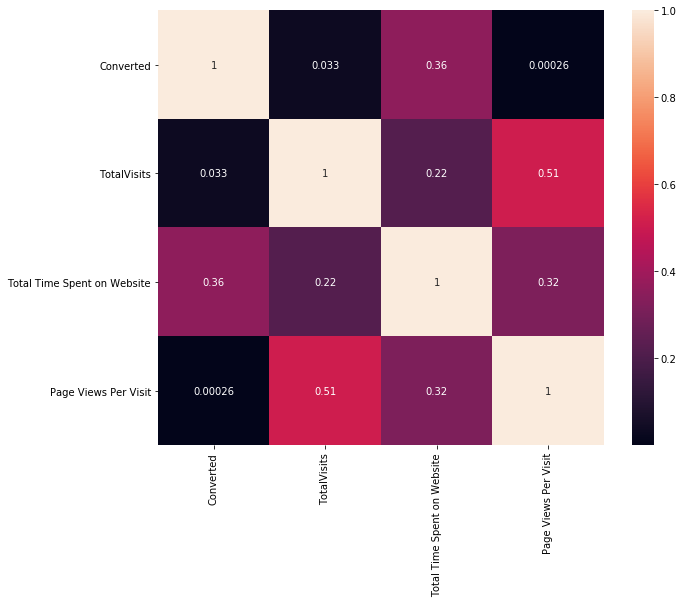

In [2147]:
plt.figure(figsize=(10,8))
sns.heatmap(lead.corr(),annot=True)
plt.show()

In [2148]:
## Checking the balance_rows

balance_rows=100*(len(lead)/len(lead2))
balance_rows

98.2034632034632

### EXPLORATORY DATA ANALYSIS & OUTLIER TREATMENT


####  Outier Treatment of Numerical Variables

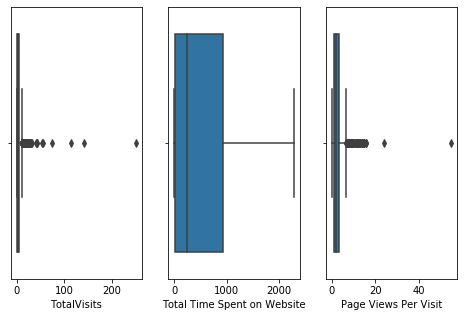

In [2149]:
plt.figure(figsize = [8,5])
plt.subplot(1,3,1)
sns.boxplot(data = lead, x = "TotalVisits")
plt.subplot(1,3,2)
sns.boxplot(data = lead, x = "Total Time Spent on Website")
plt.subplot(1,3,3)
sns.boxplot(data = lead, x = "Page Views Per Visit")
plt.show()

In [2150]:
lead['TotalVisits'].describe()

count    9074.000000
mean        3.456028
std         4.858802
min         0.000000
25%         1.000000
50%         3.000000
75%         5.000000
max       251.000000
Name: TotalVisits, dtype: float64

In [2151]:
Q3 = lead.TotalVisits.quantile(0.95)
lead = lead[(lead.TotalVisits <= Q3)]
Q1 = lead.TotalVisits.quantile(0.01)
lead = lead[(lead.TotalVisits >= Q1)]

In [2152]:

lead['Total Time Spent on Website'].describe()

count    8721.000000
mean      473.146887
std       542.265343
min         0.000000
25%         2.000000
50%       236.000000
75%       899.000000
max      2272.000000
Name: Total Time Spent on Website, dtype: float64

In [2153]:
Q3 = lead['Total Time Spent on Website'].quantile(0.95)
lead = lead[(lead['Total Time Spent on Website'] <= Q3)]
Q1 = lead['Total Time Spent on Website'].quantile(0.01)
lead = lead[(lead['Total Time Spent on Website'] >= Q1)]

In [2154]:
lead['Page Views Per Visit'].describe()

count    8287.000000
mean        2.212208
std         1.928607
min         0.000000
25%         0.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: Page Views Per Visit, dtype: float64

In [2155]:
Q3 = lead['Page Views Per Visit'].quantile(0.95)
lead = lead[(lead['Page Views Per Visit'] <= Q3)]
Q1 = lead['Page Views Per Visit'].quantile(0.01)
lead = lead[(lead['Page Views Per Visit'] >= Q1)]

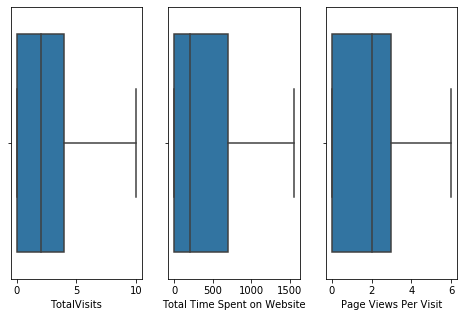

In [2156]:
plt.figure(figsize = [8,5])
plt.subplot(1,3,1)
sns.boxplot(data = lead, x = "TotalVisits")
plt.subplot(1,3,2)
sns.boxplot(data = lead, x = "Total Time Spent on Website")
plt.subplot(1,3,3)
sns.boxplot(data = lead, x = "Page Views Per Visit")

In [2157]:
round(100*(lead.isnull().sum()/len(lead.index)),2)

Lead Origin                        0.0
Lead Source                        0.0
Do Not Email                       0.0
Do Not Call                        0.0
Converted                          0.0
TotalVisits                        0.0
Total Time Spent on Website        0.0
Page Views Per Visit               0.0
Last Activity                      0.0
Specialization                     0.0
What is your current occupation    0.0
City                               0.0
Last Notable Activity              0.0
dtype: float64

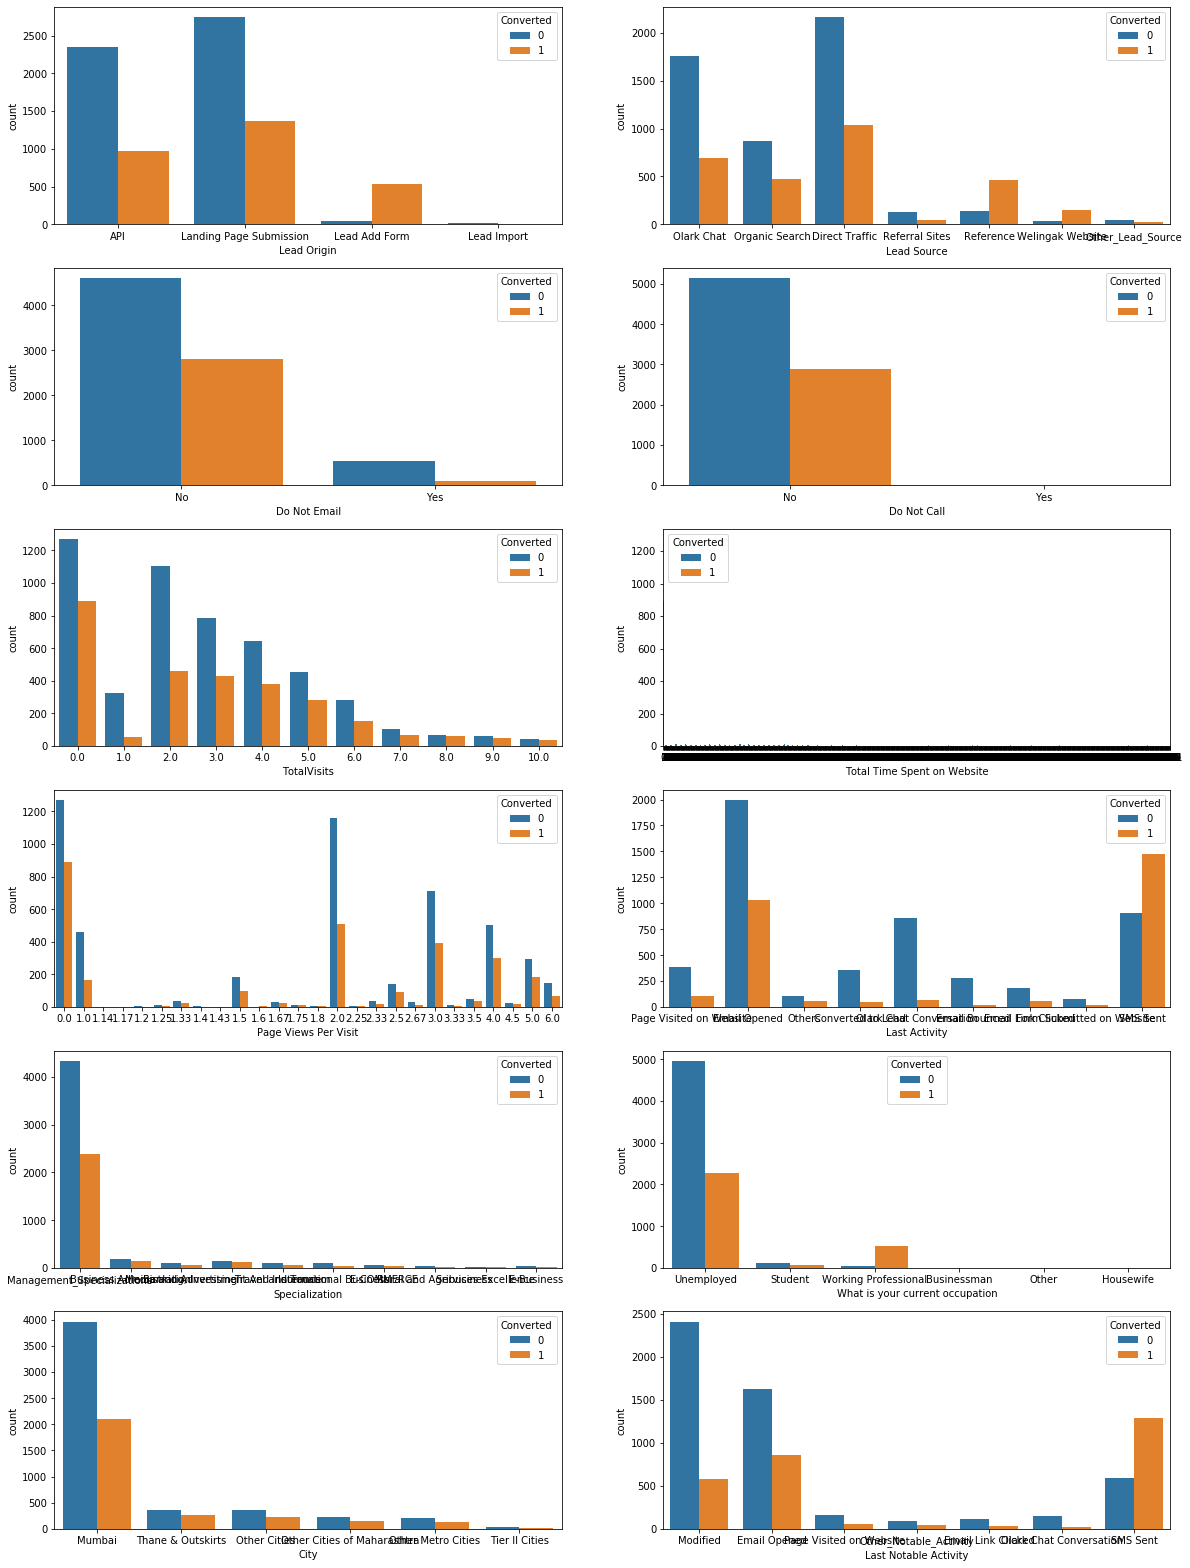

In [2158]:
features = ['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'City',
       'Last Notable Activity']
plt.figure(figsize = (20,28))
for i in enumerate(features):
    plt.subplot(6,2,i[0]+1)
    sns.countplot(x=i[1],hue='Converted',data=lead)

In [2159]:
cat_cols= lead.select_dtypes(include=['object']).columns
cat_cols



Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'City', 'Last Notable Activity'],
      dtype='object')

In [2160]:
lead['Do Not Email'].value_counts(normalize=True)

No     0.922013
Yes    0.077987
Name: Do Not Email, dtype: float64

In [2161]:
lead['Do Not Call'].value_counts(normalize=True)

No     0.999751
Yes    0.000249
Name: Do Not Call, dtype: float64

In [2162]:
# List of variables to map
binlist =  ['Do Not Call','Do Not Email']
lead[binlist]=lead[binlist].apply(lambda x:x.map({'Yes': 1,'No': 0}))
lead[binlist].head()

,Do Not Call,Do Not Email
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [2163]:
#var_list=['Lead Origin', 'Lead Source', 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       #'Last Activity', 'Specialization', 'What is your current occupation',
       #'City','Last Notable Activity','Converted']
#dummies = pd.get_dummies(lead[var_list], drop_first=True)
#print(dummies.shape)
#dummies.head()
#lead.drop(var_list,axis=1,inplace=True)

In [2164]:
var_list=['Lead Origin', 'Lead Source',
       'Last Activity', 'Specialization', 'What is your current occupation',
       'City','Last Notable Activity','Converted']
dummies = pd.get_dummies(lead[var_list], drop_first=True)
print(dummies.shape)
dummies.head()
lead.drop(var_list,axis=1,inplace=True)

(8027, 43)


In [2165]:
# Add the results to the original dataframe
lead = pd.concat([lead, dummies], axis = 1)

###  TEST-TRAIN Split

### Dividing into X & Y for model building

In [2166]:
## Taking the dependent variable on y axis and the independent variable on the x axis

y = lead['Converted']
y.head()
X=lead.drop('Converted', axis=1)

In [2167]:
## Specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)
print(X_train.shape)
X_test.shape

(5618, 47)


(2409, 47)

###  FEATURE SCALING

In [2168]:
scaler = StandardScaler()

In [2169]:
num_cols= lead.select_dtypes(exclude=['object']).columns
num_cols

Index(['Do Not Email', 'Do Not Call', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Converted',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Other_Lead_Source',
       'Lead Source_Reference', 'Lead Source_Referral Sites',
       'Lead Source_Welingak Website', 'Last Activity_Email Bounced',
       'Last Activity_Email Link Clicked', 'Last Activity_Email Opened',
       'Last Activity_Form Submitted on Website',
       'Last Activity_Olark Chat Conversation', 'Last Activity_Others',
       'Last Activity_Page Visited on Website', 'Last Activity_SMS Sent',
       'Specialization_Business Administration', 'Specialization_E-Business',
       'Specialization_E-COMMERCE', 'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Spec

In [2170]:
num_cols=X_train.select_dtypes(include=['float64', 'int64']).columns
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_train.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2626,-0.289343,-0.013343,-1.158807,-0.860855,-1.229836,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2973,-0.289343,-0.013343,0.563804,0.097800,1.185400,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
5392,3.456111,-0.013343,-0.728154,-0.109591,-0.626027,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
8344,-0.289343,-0.013343,-1.158807,-0.860855,-1.229836,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
1763,-0.289343,-0.013343,0.133151,-0.287355,0.581591,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0


### ANALYZING CORRELATIONS

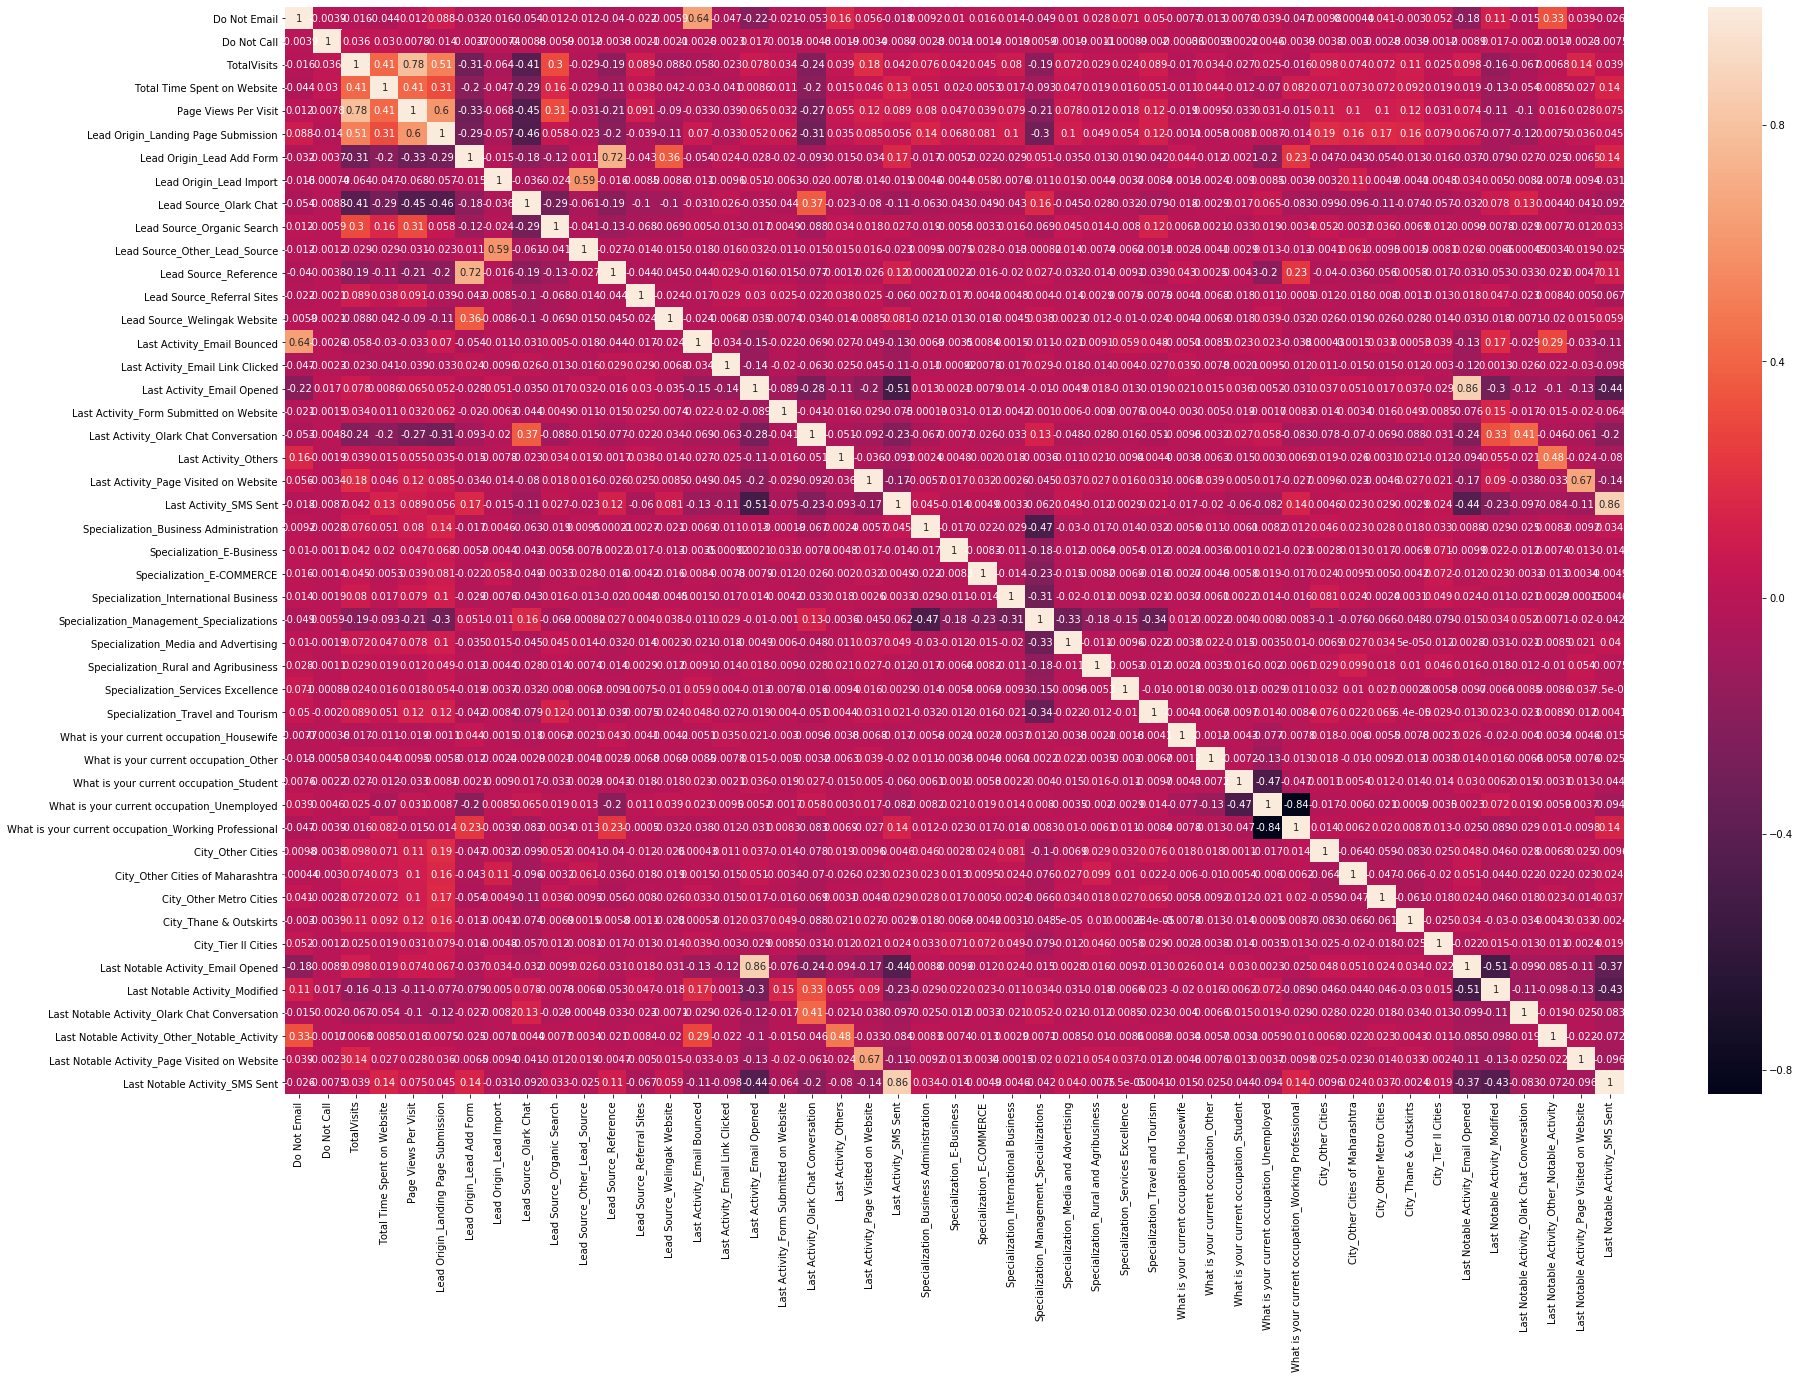

In [2171]:
plt.figure(figsize = (30, 20))
sns.heatmap(X_train.corr(),annot=True)
plt.show()

In [2172]:
X_train.drop(columns=['What is your current occupation_Unemployed','Last Notable Activity_SMS Sent'
                      ,'Last Notable Activity_Email Opened'],axis=1,inplace=True)

In [2173]:
## Checking data types of the train data set

X_train.dtypes

Do Not Email                                            float64
Do Not Call                                             float64
TotalVisits                                             float64
Total Time Spent on Website                             float64
Page Views Per Visit                                    float64
Lead Origin_Landing Page Submission                       uint8
Lead Origin_Lead Add Form                                 uint8
Lead Origin_Lead Import                                   uint8
Lead Source_Olark Chat                                    uint8
Lead Source_Organic Search                                uint8
Lead Source_Other_Lead_Source                             uint8
Lead Source_Reference                                     uint8
Lead Source_Referral Sites                                uint8
Lead Source_Welingak Website                              uint8
Last Activity_Email Bounced                               uint8
Last Activity_Email Link Clicked        

In [2174]:
logreg = LogisticRegression()
## RFE with 20 variables as output
rfe = RFE(logreg, 20)             
rfe = rfe.fit(X_train, y_train)

In [2175]:
rfe.support_

array([ True, False, False,  True, False,  True,  True,  True,  True,
       False,  True, False, False,  True,  True, False, False, False,
        True,  True, False,  True, False,  True, False, False, False,
       False, False, False, False,  True,  True,  True,  True, False,
       False, False, False, False,  True,  True,  True, False])

In [2176]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Do Not Email', True, 1),
 ('Do Not Call', False, 22),
 ('TotalVisits', False, 12),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 11),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 16),
 ('Lead Source_Other_Lead_Source', True, 1),
 ('Lead Source_Reference', False, 21),
 ('Lead Source_Referral Sites', False, 15),
 ('Lead Source_Welingak Website', True, 1),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Email Link Clicked', False, 24),
 ('Last Activity_Email Opened', False, 2),
 ('Last Activity_Form Submitted on Website', False, 23),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Others', True, 1),
 ('Last Activity_Page Visited on Website', False, 25),
 ('Last Activity_SMS Sent', True, 1),
 ('Specialization_Business Administration', False, 20),
 ('Specialization

In [2177]:
## RFE supported columns
col = X_train.columns[rfe.support_]
col

Index(['Do Not Email', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Origin_Lead Import', 'Lead Source_Olark Chat',
       'Lead Source_Other_Lead_Source', 'Lead Source_Welingak Website',
       'Last Activity_Email Bounced', 'Last Activity_Olark Chat Conversation',
       'Last Activity_Others', 'Last Activity_SMS Sent',
       'Specialization_E-Business',
       'What is your current occupation_Housewife',
       'What is your current occupation_Other',
       'What is your current occupation_Student',
       'What is your current occupation_Working Professional',
       'Last Notable Activity_Modified',
       'Last Notable Activity_Olark Chat Conversation',
       'Last Notable Activity_Other_Notable_Activity'],
      dtype='object')

In [2178]:
X_train.columns[~rfe.support_]

Index(['Do Not Call', 'TotalVisits', 'Page Views Per Visit',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Last Activity_Email Link Clicked',
       'Last Activity_Email Opened', 'Last Activity_Form Submitted on Website',
       'Last Activity_Page Visited on Website',
       'Specialization_Business Administration', 'Specialization_E-COMMERCE',
       'Specialization_International Business',
       'Specialization_Management_Specializations',
       'Specialization_Media and Advertising',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence',
       'Specialization_Travel and Tourism', 'City_Other Cities',
       'City_Other Cities of Maharashtra', 'City_Other Metro Cities',
       'City_Thane & Outskirts', 'City_Tier II Cities',
       'Last Notable Activity_Page Visited on Website'],
      dtype='object')

In [2179]:
## Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

### Building model using statsmodel, for the detailed statistics

In [2180]:
## BUILDING MODEL 

X_train_sm = sm.add_constant(X_train[col])
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5597
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2267.6
Date:                Mon, 07 Sep 2020   Deviance:                       4535.2
Time:                        23:36:56   Pearson chi2:                 5.70e+03
No. Iterations:                    20                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1559      0.093    -12.480      0.000      -1.337      -0.974
Do Not Email                                            -0.3955      0.061     -6.481      0.000      -0.515      -0.276
Total Time Spent on Website                              1.0138      0.041     24.823      0.000       0.934       1.094
Lead Origin_Landing Page Submission                     -0.5337      0.091     -5.874      0.000      -0.712      -0.356
Lead Origin_Lead Add Form                                3.8937      0.247     15.772      0.000       3.410       4.378
Lead Origin_Lead Import                                  1.4528      0.863      1.683      0.092      -0.240       3.145
Lead Source_Olark Chat                                   0.6491      0.099      6.564      0.000       0.455       0.843
Lead Source_Other_Lead_Source                           -0.8555      0.598     -1.430      0.153      -2.028       0.317
Lead Source_Welingak Website                             0.5539      0.320      1.728      0.084      -0.074       1.182
Last Activity_Email Bounced                             -0.9014      0.511     -1.763      0.078      -1.904       0.101
Last Activity_Olark Chat Conversation                   -1.0141      0.226     -4.494      0.000      -1.456      -0.572
Last Activity_Others                                     0.4085      0.364      1.123      0.261      -0.305       1.122
Last Activity_SMS Sent                                   1.3223      0.081     16.232      0.000       1.163       1.482
Specialization_E-Business                                0.7323      0.463      1.582      0.114      -0.175       1.639
What is your current occupation_Housewife               22.3464   1.19e+04      0.002      0.998   -2.32e+04    2.33e+04
What is your current occupation_Other                    0.8768      0.717      1.223      0.221      -0.528       2.281
What is your current occupation_Student                  0.4101      0.229      1.793      0.073      -0.038       0.858
What is your current occupation_Working Professional     2.8513      0.197     14.459      0.000       2.465       3.238
Last Notable Activity_Modified                          -0.8879      0.092     -9.623      0.000      -1.069      -0.707
Last Notable Activity_Olark Chat Conversation           -0.4955      0.407     -1.217      0.224      -1.293       0.303
Last Notable Activity_Other_Notable_Activity             1.0124      0.461      2.196      0.028       0.109       1.916
========================================================================================================================
"""

In [2181]:
#dropping column with high p-value

col = col.drop('What is your current occupation_Housewife',1)

In [2182]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5598
Model Family:                Binomial   Df Model:                           19
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2271.4
Date:                Mon, 07 Sep 2020   Deviance:                       4542.7
Time:                        23:36:56   Pearson chi2:                 5.71e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1512      0.093    -12.440      0.000      -1.333      -0.970
Do Not Email                                            -0.3957      0.061     -6.485      0.000      -0.515      -0.276
Total Time Spent on Website                              1.0118      0.041     24.803      0.000       0.932       1.092
Lead Origin_Landing Page Submission                     -0.5295      0.091     -5.833      0.000      -0.707      -0.352
Lead Origin_Lead Add Form                                3.9041      0.247     15.834      0.000       3.421       4.387
Lead Origin_Lead Import                                  1.4555      0.864      1.685      0.092      -0.237       3.148
Lead Source_Olark Chat                                   0.6457      0.099      6.535      0.000       0.452       0.839
Lead Source_Other_Lead_Source                           -0.8617      0.599     -1.439      0.150      -2.035       0.312
Lead Source_Welingak Website                             0.5474      0.321      1.707      0.088      -0.081       1.176
Last Activity_Email Bounced                             -0.9023      0.511     -1.765      0.078      -1.904       0.100
Last Activity_Olark Chat Conversation                   -1.0128      0.226     -4.489      0.000      -1.455      -0.571
Last Activity_Others                                     0.4061      0.364      1.116      0.264      -0.307       1.119
Last Activity_SMS Sent                                   1.3170      0.081     16.182      0.000       1.157       1.476
Specialization_E-Business                                0.7275      0.463      1.572      0.116      -0.179       1.634
What is your current occupation_Other                    0.8742      0.716      1.220      0.222      -0.530       2.278
What is your current occupation_Student                  0.4058      0.229      1.774      0.076      -0.042       0.854
What is your current occupation_Working Professional     2.8472      0.197     14.441      0.000       2.461       3.234
Last Notable Activity_Modified                          -0.8916      0.092     -9.669      0.000      -1.072      -0.711
Last Notable Activity_Olark Chat Conversation           -0.4991      0.407     -1.226      0.220      -1.297       0.299
Last Notable Activity_Other_Notable_Activity             1.0101      0.461      2.191      0.028       0.107       1.914
========================================================================================================================
"""

In [2183]:
## Dropping column with high p-value

col = col.drop('What is your current occupation_Other',1)

In [2184]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5599
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2272.1
Date:                Mon, 07 Sep 2020   Deviance:                       4544.2
Time:                        23:36:57   Pearson chi2:                 5.71e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1473      0.092    -12.409      0.000      -1.328      -0.966
Do Not Email                                            -0.3960      0.061     -6.489      0.000      -0.516      -0.276
Total Time Spent on Website                              1.0137      0.041     24.865      0.000       0.934       1.094
Lead Origin_Landing Page Submission                     -0.5312      0.091     -5.852      0.000      -0.709      -0.353
Lead Origin_Lead Add Form                                3.9028      0.247     15.829      0.000       3.420       4.386
Lead Origin_Lead Import                                  1.4550      0.863      1.685      0.092      -0.237       3.147
Lead Source_Olark Chat                                   0.6449      0.099      6.528      0.000       0.451       0.838
Lead Source_Other_Lead_Source                           -0.8637      0.599     -1.443      0.149      -2.037       0.310
Lead Source_Welingak Website                             0.5447      0.321      1.700      0.089      -0.083       1.173
Last Activity_Email Bounced                             -0.9072      0.511     -1.774      0.076      -1.909       0.095
Last Activity_Olark Chat Conversation                   -1.0104      0.225     -4.483      0.000      -1.452      -0.569
Last Activity_Others                                     0.4009      0.364      1.102      0.270      -0.312       1.114
Last Activity_SMS Sent                                   1.3141      0.081     16.156      0.000       1.155       1.474
Specialization_E-Business                                0.7245      0.463      1.566      0.117      -0.182       1.631
What is your current occupation_Student                  0.4029      0.229      1.761      0.078      -0.045       0.851
What is your current occupation_Working Professional     2.8447      0.197     14.430      0.000       2.458       3.231
Last Notable Activity_Modified                          -0.8894      0.092     -9.651      0.000      -1.070      -0.709
Last Notable Activity_Olark Chat Conversation           -0.5045      0.407     -1.240      0.215      -1.302       0.293
Last Notable Activity_Other_Notable_Activity             1.0129      0.461      2.197      0.028       0.109       1.917
========================================================================================================================
"""

In [2185]:
## Dropping column with high p-value

col = col.drop('Lead Source_Other_Lead_Source',1)

In [2186]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5600
Model Family:                Binomial   Df Model:                           17
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2273.2
Date:                Mon, 07 Sep 2020   Deviance:                       4546.5
Time:                        23:36:57   Pearson chi2:                 5.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1524      0.092    -12.475      0.000      -1.333      -0.971
Do Not Email                                            -0.3955      0.061     -6.486      0.000      -0.515      -0.276
Total Time Spent on Website                              1.0144      0.041     24.885      0.000       0.935       1.094
Lead Origin_Landing Page Submission                     -0.5325      0.091     -5.870      0.000      -0.710      -0.355
Lead Origin_Lead Add Form                                3.8845      0.246     15.814      0.000       3.403       4.366
Lead Origin_Lead Import                                  0.5960      0.624      0.955      0.340      -0.628       1.820
Lead Source_Olark Chat                                   0.6505      0.099      6.590      0.000       0.457       0.844
Lead Source_Welingak Website                             0.5567      0.320      1.740      0.082      -0.070       1.184
Last Activity_Email Bounced                             -0.9041      0.511     -1.771      0.077      -1.905       0.097
Last Activity_Olark Chat Conversation                   -1.0153      0.225     -4.505      0.000      -1.457      -0.574
Last Activity_Others                                     0.3940      0.363      1.085      0.278      -0.318       1.106
Last Activity_SMS Sent                                   1.3150      0.081     16.171      0.000       1.156       1.474
Specialization_E-Business                                0.7305      0.463      1.579      0.114      -0.176       1.637
What is your current occupation_Student                  0.3966      0.229      1.734      0.083      -0.052       0.845
What is your current occupation_Working Professional     2.8474      0.197     14.441      0.000       2.461       3.234
Last Notable Activity_Modified                          -0.8873      0.092     -9.631      0.000      -1.068      -0.707
Last Notable Activity_Olark Chat Conversation           -0.5026      0.407     -1.236      0.217      -1.300       0.295
Last Notable Activity_Other_Notable_Activity             1.0102      0.460      2.195      0.028       0.108       1.912
========================================================================================================================
"""

In [2187]:
## Dropping column with high p-value

col = col.drop('Lead Origin_Lead Import',1)

In [2188]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5601
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2273.6
Date:                Mon, 07 Sep 2020   Deviance:                       4547.3
Time:                        23:36:57   Pearson chi2:                 5.70e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1431      0.092    -12.455      0.000      -1.323      -0.963
Do Not Email                                            -0.3957      0.061     -6.491      0.000      -0.515      -0.276
Total Time Spent on Website                              1.0119      0.041     24.893      0.000       0.932       1.092
Lead Origin_Landing Page Submission                     -0.5394      0.090     -5.967      0.000      -0.717      -0.362
Lead Origin_Lead Add Form                                3.8737      0.245     15.790      0.000       3.393       4.355
Lead Source_Olark Chat                                   0.6422      0.098      6.537      0.000       0.450       0.835
Lead Source_Welingak Website                             0.5542      0.320      1.733      0.083      -0.072       1.181
Last Activity_Email Bounced                             -0.9070      0.511     -1.776      0.076      -1.908       0.094
Last Activity_Olark Chat Conversation                   -1.0201      0.225     -4.529      0.000      -1.462      -0.579
Last Activity_Others                                     0.3909      0.363      1.077      0.282      -0.321       1.102
Last Activity_SMS Sent                                   1.3138      0.081     16.159      0.000       1.154       1.473
Specialization_E-Business                                0.7298      0.462      1.578      0.114      -0.176       1.636
What is your current occupation_Student                  0.3949      0.229      1.728      0.084      -0.053       0.843
What is your current occupation_Working Professional     2.8490      0.197     14.452      0.000       2.463       3.235
Last Notable Activity_Modified                          -0.8859      0.092     -9.617      0.000      -1.066      -0.705
Last Notable Activity_Olark Chat Conversation           -0.5001      0.407     -1.230      0.219      -1.297       0.297
Last Notable Activity_Other_Notable_Activity             1.0118      0.460      2.199      0.028       0.110       1.914
========================================================================================================================
"""

In [2189]:
## Dropping column with high p-value

col = col.drop('Last Activity_Email Bounced',1)

In [2190]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5602
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2275.4
Date:                Mon, 07 Sep 2020   Deviance:                       4550.8
Time:                        23:36:57   Pearson chi2:                 5.71e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1570      0.092    -12.642      0.000      -1.336      -0.978
Do Not Email                                            -0.4370      0.057     -7.662      0.000      -0.549      -0.325
Total Time Spent on Website                              1.0128      0.041     24.912      0.000       0.933       1.092
Lead Origin_Landing Page Submission                     -0.5419      0.090     -5.996      0.000      -0.719      -0.365
Lead Origin_Lead Add Form                                3.8901      0.246     15.843      0.000       3.409       4.371
Lead Source_Olark Chat                                   0.6428      0.098      6.544      0.000       0.450       0.835
Lead Source_Welingak Website                             0.5593      0.319      1.751      0.080      -0.067       1.185
Last Activity_Olark Chat Conversation                   -0.9901      0.225     -4.405      0.000      -1.431      -0.550
Last Activity_Others                                     0.6552      0.317      2.069      0.039       0.034       1.276
Last Activity_SMS Sent                                   1.3305      0.081     16.442      0.000       1.172       1.489
Specialization_E-Business                                0.7620      0.464      1.643      0.100      -0.147       1.671
What is your current occupation_Student                  0.3929      0.228      1.720      0.085      -0.055       0.841
What is your current occupation_Working Professional     2.8394      0.196     14.488      0.000       2.455       3.224
Last Notable Activity_Modified                          -0.9121      0.091     -9.981      0.000      -1.091      -0.733
Last Notable Activity_Olark Chat Conversation           -0.5275      0.407     -1.297      0.195      -1.324       0.269
Last Notable Activity_Other_Notable_Activity             0.6331      0.387      1.634      0.102      -0.126       1.393
========================================================================================================================
"""

In [2191]:
## Dropping column with high p-value

col = col.drop('Specialization_E-Business',1)

In [2192]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5603
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2276.7
Date:                Mon, 07 Sep 2020   Deviance:                       4553.4
Time:                        23:36:58   Pearson chi2:                 5.72e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1552      0.091    -12.628      0.000      -1.335      -0.976
Do Not Email                                            -0.4347      0.057     -7.628      0.000      -0.546      -0.323
Total Time Spent on Website                              1.0130      0.041     24.927      0.000       0.933       1.093
Lead Origin_Landing Page Submission                     -0.5343      0.090     -5.923      0.000      -0.711      -0.357
Lead Origin_Lead Add Form                                3.8965      0.245     15.878      0.000       3.416       4.377
Lead Source_Olark Chat                                   0.6412      0.098      6.531      0.000       0.449       0.834
Lead Source_Welingak Website                             0.5528      0.319      1.731      0.083      -0.073       1.179
Last Activity_Olark Chat Conversation                   -0.9895      0.225     -4.401      0.000      -1.430      -0.549
Last Activity_Others                                     0.6544      0.316      2.069      0.039       0.035       1.274
Last Activity_SMS Sent                                   1.3277      0.081     16.420      0.000       1.169       1.486
What is your current occupation_Student                  0.3966      0.228      1.739      0.082      -0.050       0.844
What is your current occupation_Working Professional     2.8327      0.196     14.462      0.000       2.449       3.217
Last Notable Activity_Modified                          -0.9100      0.091     -9.960      0.000      -1.089      -0.731
Last Notable Activity_Olark Chat Conversation           -0.5288      0.407     -1.301      0.193      -1.326       0.268
Last Notable Activity_Other_Notable_Activity             0.6333      0.387      1.637      0.102      -0.125       1.392
========================================================================================================================
"""

In [2193]:
## Dropping column with high p-value

col = col.drop('What is your current occupation_Student',1)

In [2194]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5604
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2278.2
Date:                Mon, 07 Sep 2020   Deviance:                       4556.4
Time:                        23:36:58   Pearson chi2:                 5.72e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1430      0.091    -12.548      0.000      -1.322      -0.964
Do Not Email                                            -0.4347      0.057     -7.622      0.000      -0.546      -0.323
Total Time Spent on Website                              1.0127      0.041     24.934      0.000       0.933       1.092
Lead Origin_Landing Page Submission                     -0.5305      0.090     -5.888      0.000      -0.707      -0.354
Lead Origin_Lead Add Form                                3.9090      0.245     15.937      0.000       3.428       4.390
Lead Source_Olark Chat                                   0.6435      0.098      6.559      0.000       0.451       0.836
Lead Source_Welingak Website                             0.5397      0.319      1.690      0.091      -0.086       1.166
Last Activity_Olark Chat Conversation                   -0.9847      0.225     -4.381      0.000      -1.425      -0.544
Last Activity_Others                                     0.6420      0.316      2.029      0.042       0.022       1.262
Last Activity_SMS Sent                                   1.3179      0.081     16.356      0.000       1.160       1.476
What is your current occupation_Working Professional     2.8206      0.196     14.415      0.000       2.437       3.204
Last Notable Activity_Modified                          -0.9124      0.091     -9.988      0.000      -1.091      -0.733
Last Notable Activity_Olark Chat Conversation           -0.5310      0.407     -1.304      0.192      -1.329       0.267
Last Notable Activity_Other_Notable_Activity             0.6328      0.387      1.634      0.102      -0.126       1.392
========================================================================================================================
"""

In [2195]:
## Dropping column with high p-value

col = col.drop('Lead Source_Welingak Website',1)

In [2196]:
X_train_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 5618
Model:                            GLM   Df Residuals:                     5605
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2279.6
Date:                Mon, 07 Sep 2020   Deviance:                       4559.3
Time:                        23:36:58   Pearson chi2:                 5.79e+03
No. Iterations:                     6                                         
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.1338      0.091    -12.473      0.000      -1.312      -0.956
Do Not Email                                            -0.4326      0.057     -7.615      0.000      -0.544      -0.321
Total Time Spent on Website                              1.0144      0.041     24.989      0.000       0.935       1.094
Lead Origin_Landing Page Submission                     -0.5358      0.090     -5.951      0.000      -0.712      -0.359
Lead Origin_Lead Add Form                                4.0314      0.237     16.977      0.000       3.566       4.497
Lead Source_Olark Chat                                   0.6344      0.098      6.477      0.000       0.442       0.826
Last Activity_Olark Chat Conversation                   -0.9804      0.225     -4.361      0.000      -1.421      -0.540
Last Activity_Others                                     0.6449      0.317      2.035      0.042       0.024       1.266
Last Activity_SMS Sent                                   1.3194      0.081     16.382      0.000       1.162       1.477
What is your current occupation_Working Professional     2.8217      0.196     14.407      0.000       2.438       3.206
Last Notable Activity_Modified                          -0.9101      0.091     -9.968      0.000      -1.089      -0.731
Last Notable Activity_Olark Chat Conversation           -0.5132      0.405     -1.268      0.205      -1.307       0.280
Last Notable Activity_Other_Notable_Activity             0.6219      0.387      1.606      0.108      -0.137       1.381
========================================================================================================================
"""

In [2197]:
## Creating dataframe that will contain the feature variables & respective VIFs & Checkingthe VIF values of the feature variables. 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Olark Chat Conversation,1.96
9,Last Notable Activity_Modified,1.84
2,Lead Origin_Landing Page Submission,1.61
4,Lead Source_Olark Chat,1.57
7,Last Activity_SMS Sent,1.50
11,Last Notable Activity_Other_Notable_Activity,1.50
6,Last Activity_Others,1.36
10,Last Notable Activity_Olark Chat Conversation,1.35
3,Lead Origin_Lead Add Form,1.30
1,Total Time Spent on Website,1.26


In [2198]:
## Obtaining the Predicted values on the train set

y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

2626    0.517974
2973    0.190751
5392    0.014978
8344    0.041572
1763    0.072017
9053    0.083468
5355    0.103631
109     0.172460
697     0.421449
645     0.223144
dtype: float64

In [2199]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.51797423, 0.19075123, 0.01497844, 0.04157171, 0.07201678,
       0.08346813, 0.10363117, 0.17245958, 0.42144862, 0.22314417])

#### Creating a dataframe with the Converted  and predicted probabilities

In [2200]:
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Converted_prob':y_train_pred})
y_train_pred_final['Prospect ID'] = y_train.index
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID
0,1,0.517974,2626
1,0,0.190751,2973
2,0,0.014978,5392
3,0,0.041572,8344
4,0,0.072017,1763


#### Creating new column 'predicted' with 1 , if Converted_Prob > 0.5 else 0

In [2201]:
y_train_pred_final['Predicted'] = y_train_pred_final.Converted_prob.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted
0,1,0.517974,2626,1
1,0,0.190751,2973,0
2,0,0.014978,5392,0
3,0,0.041572,8344,0
4,0,0.072017,1763,0


In [2202]:
## Confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3228  361]
 [ 612 1417]]


In [2203]:
## Let's check the overall accuracy.

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.8268066927732289


In [2204]:
## Creating dataframe that will contain the feature variables & respective VIFs & Checkingthe VIF values of the feature variable 
vif = pd.DataFrame()
vif['Features'] = X_train[col].columns
vif['VIF'] = [variance_inflation_factor(X_train[col].values, i) for i in range(X_train[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
5,Last Activity_Olark Chat Conversation,1.96
9,Last Notable Activity_Modified,1.84
2,Lead Origin_Landing Page Submission,1.61
4,Lead Source_Olark Chat,1.57
7,Last Activity_SMS Sent,1.50
11,Last Notable Activity_Other_Notable_Activity,1.50
6,Last Activity_Others,1.36
10,Last Notable Activity_Olark Chat Conversation,1.35
3,Lead Origin_Lead Add Form,1.30
1,Total Time Spent on Website,1.26


In [2205]:
TP = confusion[1,1] ## True Positive 
TN = confusion[0,0] ## True Negatives
FP = confusion[0,1] ## False Positives
FN = confusion[1,0] ## False Negatives

In [2206]:
## Sensitivity of logistic regression model

TP / float(TP+FN)

0.6983735830458354

In [2207]:
## Calculating specificity

TN / float(TN+FP)

0.8994148787963221

In [2208]:
## Calculatinf False Postive Rate 
FP/ float(TN+FP)

0.10058512120367791

In [2209]:
## Positive Predictive value 

TP / float(TP+FP)

0.796962879640045

In [2210]:
## Negative predictive value

TN / float(TN+ FN)

0.840625

### PLOTTING THE ROC CURVE

In [2211]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [2212]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Converted_prob, drop_intermediate = False )

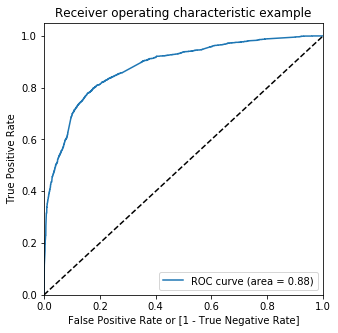

In [2213]:
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

In [2214]:
## Creating columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Converted_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.517974,2626,1,1,1,1,1,1,1,0,0,0,0
1,0,0.190751,2973,0,1,1,0,0,0,0,0,0,0,0
2,0,0.014978,5392,0,1,0,0,0,0,0,0,0,0,0
3,0,0.041572,8344,0,1,0,0,0,0,0,0,0,0,0
4,0,0.072017,1763,0,1,0,0,0,0,0,0,0,0,0


In [2215]:
## Calculate accuracy sensitivity and specificity for various probability cutoffs.

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])

## TP = confusion[1,1] ## True positive 
## TN = confusion[0,0] ## True negatives
## FP = confusion[0,1] ## False positives
## FN = confusion[1,0] ## False negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.361161  1.000000  0.000000
0.1   0.1  0.601282  0.959093  0.398997
0.2   0.2  0.732289  0.905372  0.634439
0.3   0.3  0.802955  0.819616  0.793536
0.4   0.4  0.822001  0.759487  0.857342
0.5   0.5  0.826807  0.698374  0.899415
0.6   0.6  0.800997  0.571217  0.930900
0.7   0.7  0.793165  0.503696  0.956812
0.8   0.8  0.774475  0.414983  0.977710
0.9   0.9  0.727483  0.256777  0.993592


<Figure size 720x576 with 0 Axes>

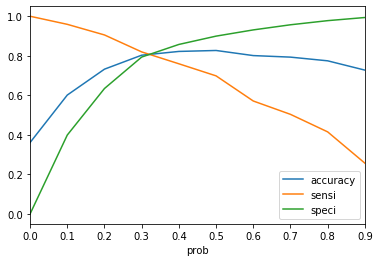

In [2216]:
## Plotting accuracy sensitivity and specificity for various probabilities.

plt.figure(figsize=(10,8))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()


In [2217]:
## From the curve above, 0.3 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Converted_prob.map( lambda x: 1 if x > 0.30 else 0)

y_train_pred_final.head()

,Converted,Converted_prob,Prospect ID,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_Predicted
0,1,0.517974,2626,1,1,1,1,1,1,1,0,0,0,0,1
1,0,0.190751,2973,0,1,1,0,0,0,0,0,0,0,0,0
2,0,0.014978,5392,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0.041572,8344,0,1,0,0,0,0,0,0,0,0,0,0
4,0,0.072017,1763,0,1,0,0,0,0,0,0,0,0,0,0


In [2218]:
y_train_pred_final['Lead_Score'] = y_train_pred_final.Converted_prob.map( lambda x: round(x*100))

y_train_pred_final[['Converted','Converted_prob','Prospect ID','final_Predicted','Lead_Score']].head()

,Converted,Converted_prob,Prospect ID,final_Predicted,Lead_Score
0,1,0.517974,2626,1,52
1,0,0.190751,2973,0,19
2,0,0.014978,5392,0,1
3,0,0.041572,8344,0,4
4,0,0.072017,1763,0,7


In [2219]:
## Checking the overall accuracy.

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8029547881808473

In [2220]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion2

array([[2848,  741],
       [ 366, 1663]])

In [2221]:
TP = confusion2[1,1] ## True positive 
TN = confusion2[0,0] ## True negatives
FP = confusion2[0,1] ## False positives
FN = confusion2[1,0] ## False negatives

In [2222]:
## Sensitivity of logistic regression model

TP / float(TP+FN)

0.8196155741744702

In [2223]:
## Calculating specificity

TN / float(TN+FP)

0.7935358038450822

In [2224]:
## Calculating False Postive Rate - predicting conversion when customer does not have convert
print(FP/ float(TN+FP))

0.20646419615491782


In [2225]:
## Positive predictive value 

print (TP / float(TP+FP))

0.6917637271214643


In [2226]:
## Negative predictive value

print (TN / float(TN+ FN))

0.8861232109520847


## Precision and Recall

In [2227]:
#Looking at the confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_Predicted )
confusion

array([[2848,  741],
       [ 366, 1663]])

##### Precision
TP / TP + FP

In [2228]:
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.6917637271214643

##### Recall
TP / TP + FN

In [2229]:
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.8196155741744702

In [2230]:
precision_score(y_train_pred_final.Converted , y_train_pred_final.final_Predicted)

0.6917637271214643

In [2231]:
recall_score(y_train_pred_final.Converted, y_train_pred_final.final_Predicted)

0.8196155741744702

### Precision and recall tradeoff

In [2232]:
y_train_pred_final.Converted, y_train_pred_final.final_Predicted
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Converted_prob)

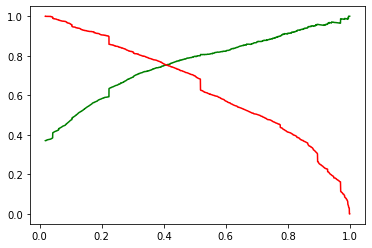

In [2233]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

### Step : Making predictions on the test set

In [2234]:
## Scaling test set
num_cols=X_test.select_dtypes(include=['float64', 'int64']).columns
X_test[num_cols] = scaler.fit_transform(X_test[num_cols])
X_test.head()

,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Olark Chat,Lead Source_Organic Search,Lead Source_Other_Lead_Source,Lead Source_Reference,Lead Source_Referral Sites,Lead Source_Welingak Website,Last Activity_Email Bounced,Last Activity_Email Link Clicked,Last Activity_Email Opened,Last Activity_Form Submitted on Website,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_International Business,Specialization_Management_Specializations,Specialization_Media and Advertising,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Travel and Tourism,What is your current occupation_Housewife,What is your current occupation_Other,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,City_Other Cities,City_Other Cities of Maharashtra,City_Other Metro Cities,City_Thane & Outskirts,City_Tier II Cities,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activity,Last Notable Activity_Page Visited on Website,Last Notable Activity_SMS Sent
2375,3.398069,-0.020378,-0.304539,-0.397012,-0.006250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
5128,-0.294285,-0.020378,-0.304539,-0.364940,-0.006250,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1
2484,-0.294285,-0.020378,0.118549,0.926462,-0.309176,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
2445,-0.294285,-0.020378,0.118549,-0.835319,0.599603,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0
4014,-0.294285,-0.020378,-1.150714,-0.846009,-1.217955,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0


In [2235]:
X_test = X_test[col]
X_test.head()

,Do Not Email,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_SMS Sent,What is your current occupation_Working Professional,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Other_Notable_Activity
2375,3.398069,-0.397012,0,0,0,0,0,0,0,0,0,0
5128,-0.294285,-0.364940,1,0,0,0,0,1,0,0,0,0
2484,-0.294285,0.926462,0,0,0,0,0,1,0,1,0,0
2445,-0.294285,-0.835319,1,0,0,0,0,1,0,1,0,0
4014,-0.294285,-0.846009,0,0,1,0,0,0,0,0,0,0


In [2236]:
X_test_sm = sm.add_constant(X_test)

### PREDICTIONS ON TEST SET

In [2237]:
y_test_pred = res.predict(X_test_sm)

In [2238]:
y_test_pred[:10]

2375    0.047125
5128    0.355938
2484    0.584831
2445    0.121290
4014    0.226140
3185    0.929303
946     0.315066
1707    0.042262
4333    0.713886
89      0.277430
dtype: float64

In [2239]:
## Converting y_pred to a dataframe which is an array

y_pred_1 = pd.DataFrame(y_test_pred)

In [2240]:
y_pred_1.head()

,0
2375,0.047125
5128,0.355938
2484,0.584831
2445,0.121290
4014,0.226140


In [2241]:
## Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [2242]:
## Inserting  CustID to index

y_test_df['Prospect ID'] = y_test_df.index

In [2243]:
## Removing index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [2244]:
## Appending y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [2245]:
y_pred_final.head()

,Converted,Prospect ID,0
0,0,2375,0.047125
1,0,5128,0.355938
2,1,2484,0.584831
3,0,2445,0.121290
4,1,4014,0.226140


In [2246]:
## Renaming the column 

y_pred_final= y_pred_final.rename(columns={ 0 : 'Converted_prob'})

In [2247]:
y_pred_final.head()

,Converted,Prospect ID,Converted_prob
0,0,2375,0.047125
1,0,5128,0.355938
2,1,2484,0.584831
3,0,2445,0.121290
4,1,4014,0.226140


In [2248]:
## Rearranging the columns

y_pred_final = y_pred_final[['Prospect ID','Converted','Converted_prob']]
y_pred_final['lead_score'] = y_pred_final.Converted_prob.map( lambda x: round(x*100))

In [2249]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,lead_score
0,2375,0,0.047125,5
1,5128,0,0.355938,36
2,2484,1,0.584831,58
3,2445,0,0.121290,12
4,4014,1,0.226140,23


In [2250]:
y_pred_final['final_Converted'] = y_pred_final.Converted_prob.map(lambda x: 1 if x > 0.30 else 0)

In [2251]:
y_pred_final.head()

,Prospect ID,Converted,Converted_prob,lead_score,final_Converted
0,2375,0,0.047125,5,0
1,5128,0,0.355938,36,1
2,2484,1,0.584831,58,1
3,2445,0,0.121290,12,0
4,4014,1,0.226140,23,0


In [2252]:
## Checking the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_Converted)

0.7957658779576587

In [2253]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_Converted )
confusion2

array([[1224,  331],
       [ 161,  693]])

In [2254]:
TP = confusion2[1,1] ## True positive 
TN = confusion2[0,0] ## True negatives
FP = confusion2[0,1] ## False positives
FN = confusion2[1,0] ## False negatives

In [2255]:
## Sensitivity of logistic regression model
TP / float(TP+FN)

0.8114754098360656

In [2256]:
## Calculate specificity
TN / float(TN+FP)

0.7871382636655948

In [2257]:
precision_score(y_pred_final.Converted , y_pred_final.final_Converted)

0.6767578125

In [2258]:
recall_score(y_pred_final.Converted, y_pred_final.final_Converted)

0.8114754098360656

In [ ]:
## End of code..